# Módulo 1: Fundamentos de Deep Learning

# Bootcamp Analista de Machine Learning - XEP IGTI

## Objetivo do Projeto

Utilizar duas redes de de Machine Learning (VGG16 e Manual) para resolver o problema de classificação Fashion MNIST. 

## Instações

In [ ]:
!pip3 install keras

In [ ]:
!pip3 install tensorflow

In [ ]:
!pip3 install np_utils

## Importações

In [22]:
import pandas as pd
import numpy as np
import seaborn as sns

from matplotlib import pyplot as plt

#Importações do Keras dataset
from keras.datasets import fashion_mnist
from keras.models import Sequential, Model
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.utils.np_utils import to_categorical
from keras.utils import np_utils
from sklearn.metrics import accuracy_score, classification_report, precision_score, SCORERS


#importações do modelo VGG16
from keras.applications.vgg16 import VGG16

from tensorflow.image import resize

## Importando dadaset

In [5]:
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [6]:
SelectImg = X_test[4000]

In [7]:
SelectImg = np.array(SelectImg, dtype='float')

In [8]:
pixels = SelectImg.reshape(28,28)

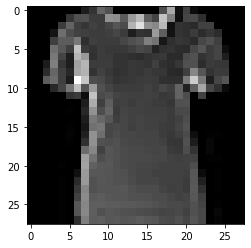

Classificação: 0


In [9]:
plt.imshow(SelectImg, cmap='gray')
plt.show()

print(f'Classificação: {y_test[4000]}')

## VGG16

In [10]:
#Aplicando o modelo VGG16 e redimensionando o tamanho da imagem
ModeloVGG16 = VGG16(input_shape=(32,32,3), classes=10, weights=None)

#Verificando parâmetros
ModeloVGG16.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 32, 32, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 32, 32, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 16, 16, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 16, 16, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 16, 16, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 8, 8, 128)         0     

### Ajustando dataset

In [11]:
#Ajustando o size do X
X_trainCopy = np.expand_dims(X_train, axis= -1)
X_trainCopy = np.repeat(X_trainCopy, 3, axis= -1)
X_trainResize = resize(X_trainCopy,[32,32])

pixelsCount = X_trainResize.shape[1] * X_trainResize.shape[2]

In [12]:
pixelsCount

1024

In [13]:
X_trainResize.shape

TensorShape([60000, 32, 32, 3])

In [14]:
X_trainResize.shape

TensorShape([60000, 32, 32, 3])

In [15]:
y_train_h = np_utils.to_categorical(y_train)
y_test_h = np_utils.to_categorical(y_test)
num_classes = y_test_h.shape[1]

### Aplicando VVG16

In [36]:
ModeloVGG16.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history2 = ModeloVGG16.fit(X_trainResize/255, y_train_h, validation_data=(X_trainResize/255, y_train_h), epochs=10, verbose=1,batch_size=128)

scores = ModeloVGG16.evaluate(X_trainResize, y_train_h, verbose=0) 

Epoch 1/10
469/469 [==============================] - 41s 76ms/step - loss: 2.3027 - accuracy: 0.0969 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 2/10
469/469 [==============================] - 35s 75ms/step - loss: 2.3027 - accuracy: 0.0976 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 3/10
469/469 [==============================] - 37s 79ms/step - loss: 2.3027 - accuracy: 0.0979 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 4/10
469/469 [==============================] - 35s 74ms/step - loss: 2.3027 - accuracy: 0.0986 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 5/10
469/469 [==============================] - 37s 80ms/step - loss: 2.3027 - accuracy: 0.0998 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 6/10
469/469 [==============================] - 35s 74ms/step - loss: 2.3027 - accuracy: 0.0980 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 7/10
469/469 [==============================] - 37s 80ms/step - loss: 2.3027 - accuracy: 0.0988 - val_loss: 2.3026 - val_accuracy:

In [25]:
print("%s: %.2f%%" % (ModeloVGG16.metrics_names[1], scores[1]*100))

accuracy: 10.00%


## Modelo Manual

In [26]:
(X_trainManual, y_trainManual), (X_testManual, y_testManual) = fashion_mnist.load_data()

In [27]:
X_trainManual.shape

(60000, 28, 28)

In [28]:
pixelsManual = X_trainManual.shape[1] * X_trainManual.shape[2]
pixelsManual

784

In [29]:
X_trainM2 = X_trainManual.reshape(X_trainManual.shape[0], pixelsManual)
X_trainM2.shape

(60000, 784)

In [30]:
X_trainM2 = X_testManual.reshape(X_testManual.shape[0], pixelsManual).astype("float32")
X_trainM2.shape

(10000, 784)

In [31]:
y_trainManual2 = np_utils.to_categorical(y_trainManual)
y_testManual2 = np_utils.to_categorical(y_testManual)

In [32]:
X_trainM2 = X_trainM2/255
X_testManual = X_trainM2/255

In [33]:
model = Sequential()

In [34]:
model.add(Dense(pixelsManual, input_dim=pixelsManual, kernel_initializer='normal', activation='relu'))
model.add(Dense(1024, kernel_initializer='normal', activation='relu'))
model.add(Dense(2048, kernel_initializer='normal', activation='relu'))
model.add(Dense(2048, kernel_initializer='normal', activation='relu'))
model.add(Dense(10, kernel_initializer='normal', activation='softmax'))

In [35]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 784)               615440    
                                                                 
 dense_1 (Dense)             (None, 1024)              803840    
                                                                 
 dense_2 (Dense)             (None, 2048)              2099200   
                                                                 
 dense_3 (Dense)             (None, 2048)              4196352   
                                                                 
 dense_4 (Dense)             (None, 10)                20490     
                                                                 
Total params: 7,735,322
Trainable params: 7,735,322
Non-trainable params: 0
_________________________________________________________________


### - fim -